### Dataset Visualizations

Dataset used: [Real Estate dataset](http://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

##### Features:
* transcation date: the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* house age: the house age (unit: year)
* MRT distance: the distance to the nearest MRT station (unit: meter)
* number of stores: the number of convenience stores in the living circle on foot (integer)
* latitude: the geographic coordinate, latitude. (unit: degree)
* longitude: the geographic coordinate, longitude. (unit: degree)

The output is as follow
* price: house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

In [3]:
# All imports needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor

In [4]:
# Read data from file
file_names = ['transaction date', 'house age', 'MRT distance', 'number of stores', 'latitude', 'longitude', 'price']
real_estate = pd.read_csv("../data/estate/Real estate valuation data set.csv", header = 0, names = file_names, usecols = range(1,8)) 

real_estate.head()

,transaction date,house age,MRT distance,number of stores,latitude,longitude,price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### Modeling:

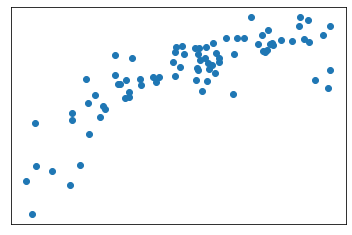

In [5]:
train, test = train_test_split(real_estate, test_size=0.2)

# Training Model
x_train = train.drop('price', axis=1)
y_train = train['price']

model = LinearRegression()
model.fit(x_train, y_train)

r_sq = model.score(x_train, y_train)

# Testing
x_test = test.drop('price', axis=1)
y_test = test['price']
y_pred = model.predict(x_test)

# Plot outputs
plt.scatter(y_test, y_pred)

plt.xticks(())
plt.yticks(())

plt.show()

ValueError: x and y must be the same size

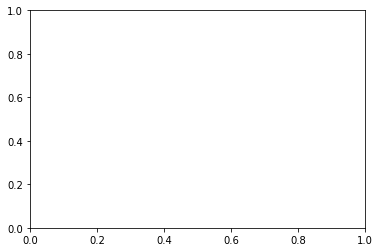

In [23]:
######### Polynomial Regression #########

train, test = train_test_split(real_estate, test_size=0.2)

# Training Model
x_train = train.drop('price', axis=1)
y_train = train['price']

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x_train)

model = LinearRegression()
model.fit(x_poly, y_train)
y_pred = model.predict(x_poly)

# Testing
x_test = test.drop('price', axis=1)
y_test = test['price']
#y_pred = model.predict(x_test)

# Plot outputs
plt.scatter(y_test, y_pred)

plt.xticks(())
plt.yticks(())

plt.show()

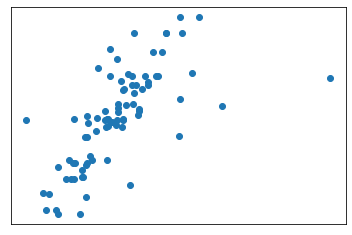

In [19]:
######### knn Regression #########

train, test = train_test_split(real_estate, test_size=0.2)
n_neighbors = 5

# Training Model
x_train = train.drop('price', axis=1)
y_train = train['price']

model = neighbors.KNeighborsRegressor(n_neighbors)
model.fit(x_train, y_train)

r_sq = model.score(x_train, y_train)

# Testing
x_test = test.drop('price', axis=1)
y_test = test['price']
y_pred = model.predict(x_test)

# Plot outputs
plt.scatter(y_test, y_pred)

plt.xticks(())
plt.yticks(())

plt.show()

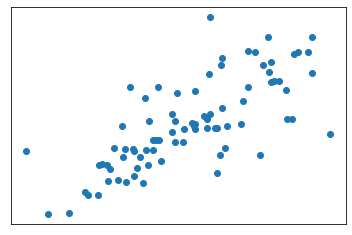

In [15]:
######### Regression Trees #########

train, test = train_test_split(real_estate, test_size=0.2)

# Training Model
x_train = train.drop('price', axis=1)
y_train = train['price']

model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

r_sq = model.score(x_train, y_train)

# Testing
x_test = test.drop('price', axis=1)
y_test = test['price']
y_pred = model.predict(x_test)

# Plot outputs
plt.scatter(y_test, y_pred)

plt.xticks(())
plt.yticks(())

plt.show()